# Python Programming
**Project Group**: Group 10


## 1. Understand the Dataset Context

•
Objective Clarification: Define the purpose of the analysis and the questions you aim to answer.
•
Data Source Identification: Determine the source of the data, its collection methods, and any relevant background information.

The goal of this analysis is to understand the factors influencing electric vehicle (EV) pricing. The dataset includes a variety of columns that provide detailed information about each vehicle, such as geographical data ('County', 'City', 'State', 'Postal Code', '2020 Census Tract'), vehicle-specific attributes ('VIN (1-10)', 'Make', 'Model', 'Electric Vehicle Type', 'Base MSRP', 'Electric Range', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'DOL Vehicle ID', 'Legislative District'), as well as derived features like 'Age of Vehicle', 'Electric Range Category', 'EV Adoption Year', 'Price Category', 'Is Premium Vehicle', 'Vehicle Age', 'Price per Electric Range', and a clustering label ('Cluster'). The analysis aims to explore how different factors such as model year, location, electric range, and vehicle type impact EV pricing, segmenting the market to identify pricing patterns and premium vehicle characteristics. Additionally, clustering techniques are used to group vehicles based on similar attributes, allowing for a deeper understanding of price variations across different segments.

## 2. Import Libraries and Load Data
Import Necessary Libraries: Load libraries such as pandas, numpy, matplotlib, seaborn, etc.
Load the Dataset: Load the dataset into a DataFrame using pandas (assume using Python.

#### 2.1 Read the dataset and import libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression


In [111]:
population_data = pd.read_csv(r"Electric_Vehicle_Population_Data (1).csv")

In [112]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

In [68]:
population_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
population_data["Maker & Model Year"] = population_data["Make"] + " " + population_data["Model"] + " " +population_data["Model Year"].astype('str')

In [6]:
len(population_data["Maker & Model Year"].unique())

532

In [7]:
no_range_data = list(population_data[population_data["Electric Range"] == 0]["Maker & Model Year"].unique())
len(no_range_data)

177

In [8]:
no_range_data

['FORD F-150 2022',
 'TESLA MODEL Y 2023',
 'RIVIAN R1S 2023',
 'TESLA MODEL 3 2023',
 'KIA NIRO 2023',
 'KIA EV6 2023',
 'LEXUS RZ 2024',
 'NISSAN LEAF 2025',
 'KIA NIRO 2024',
 'KIA EV6 2022',
 'GENESIS GV60 2024',
 'FORD MUSTANG MACH-E 2023',
 'BMW IX 2022',
 'TESLA MODEL 3 2024',
 'BMW I4 2022',
 'TESLA MODEL 3 2022',
 'VOLVO XC40 2024',
 'TESLA MODEL Y 2021',
 'NISSAN ARIYA 2024',
 'TESLA MODEL Y 2024',
 'TESLA MODEL Y 2022',
 'VOLKSWAGEN ID.4 2023',
 'MERCEDES-BENZ EQE-CLASS SUV 2023',
 'HYUNDAI IONIQ 5 2023',
 'AUDI E-TRON 2022',
 'TESLA MODEL S 2023',
 'TESLA MODEL 3 2021',
 'SUBARU SOLTERRA 2023',
 'VOLKSWAGEN ID.4 2021',
 'NISSAN LEAF 2022',
 'BMW IX 2025',
 'CHEVROLET BOLT EV 2021',
 'CHEVROLET BOLT EV 2023',
 'KIA EV9 2024',
 'TESLA MODEL X 2022',
 'CHEVROLET BOLT EUV 2023',
 'HYUNDAI IONIQ 6 2024',
 'RIVIAN R1S 2025',
 'AUDI Q4 2022',
 'BMW I4 2024',
 'PORSCHE TAYCAN 2022',
 'TESLA MODEL S 2022',
 'POLESTAR PS2 2022',
 'HONDA PROLOGUE 2024',
 'TESLA MODEL X 2023',
 'VOLVO 

## 3. Initial Data Inspection
 View Data Structure: Use functions like .head(), .tail(), .info(), and .describe() t 
get a sense of the data structure, types, and summary statistic


• Check Dimensions: Identify the number of rows and columns using .shape(
I
• Identify Missing Values: Use .isnull().sum() to check for missing values.

#### 3.1 Simple data inspections, head, tail, info

In [21]:
print("Print Head")
population_data.head()


Print Head


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [22]:
print("Print info")
population_data.info()

Print info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-n

#### 3.2 Discriptive Inspections

In [9]:
print("Print Describe")
population_data.describe()

Print Describe


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,210161.000000,210165.000000,210160.000000,210160.000000,209720.000000,2.101650e+05,2.101610e+05
mean,98178.209406,2021.048657,50.602241,897.676889,28.929954,2.290774e+08,5.297929e+10
std,2445.429402,2.988941,86.973210,7653.588604,14.908392,7.115519e+07,1.551466e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948816e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405164e+08,5.303303e+10
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.629758e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


#### 3.3 Null Value , Duplicates and Uniqueness inspections, min and max value counts for Electic Range and MSRP

In [11]:
uniqueness_count = population_data.nunique()
# Calculate the percentage of unique values for each column
uniqueness_percentage = (uniqueness_count / len(population_data)) * 100
# Display the uniqueness percentage along with the column names
for column, percentage in uniqueness_percentage.items():
    print(f"Column: {column}, Unique Percentage: {percentage:.2f}%")

Column: VIN (1-10), Unique Percentage: 5.89%
Column: County, Unique Percentage: 0.10%
Column: City, Unique Percentage: 0.36%
Column: State, Unique Percentage: 0.02%
Column: Postal Code, Unique Percentage: 0.44%
Column: Model Year, Unique Percentage: 0.01%
Column: Make, Unique Percentage: 0.02%
Column: Model, Unique Percentage: 0.07%
Column: Electric Vehicle Type, Unique Percentage: 0.00%
Column: Clean Alternative Fuel Vehicle (CAFV) Eligibility, Unique Percentage: 0.00%
Column: Electric Range, Unique Percentage: 0.05%
Column: Base MSRP, Unique Percentage: 0.01%
Column: Legislative District, Unique Percentage: 0.02%
Column: DOL Vehicle ID, Unique Percentage: 100.00%
Column: Vehicle Location, Unique Percentage: 0.44%
Column: Electric Utility, Unique Percentage: 0.04%
Column: 2020 Census Tract, Unique Percentage: 1.03%
Column: Maker & Model Year, Unique Percentage: 0.25%


In [12]:
max(population_data['Base MSRP'].value_counts())/len(population_data) * 100

98.42314372041015

In [13]:
max(population_data['Electric Range'].value_counts())/len(population_data) * 100

56.45754526205601

## 4. Data Cleaning
•
Handle Missing Data:
o
Impute Missing Values: Fill missing values using strategies like mean, median, or mode imputation, or domain-specific methods.
o
Remove Missing Values: Drop rows or columns with missing data if appropriate.
•
Handle Outliers:
o
Detect Outliers: Use visualizations (e.g., box plots) or statistical methods (e.g., Z-scores) to identify outliers.
o
Treat Outliers: Depending on the context, either remove, transform, or cap outliers.
•
Correct Data Types: Ensure that each feature has the correct data type (e.g., convert columns to categorical, datetime, etc.).
•
Handle Duplicates: Check for and remove duplicate records.

#### 4.1 Typecasting the dataset and Dropping Nulls

In [94]:
population_data = population_data.astype({
    'VIN (1-10)':'category',
    'Postal Code':'Int64',
    'County': 'category',                                         
   'City': 'category',
    'State': 'category',
    'Postal Code': 'str',
    'Make': 'category',
    'Model': 'category',
    'Electric Vehicle Type': 'category',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'category',
    'Legislative District': 'Int64',
    'Electric Utility': 'category',
    '2020 Census Tract': 'Int64',
    'Vehicle Location':'str',
    'Base MSRP': 'Int64'
   
})
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         210165 non-null  category
 1   County                                             210161 non-null  category
 2   City                                               210161 non-null  category
 3   State                                              210165 non-null  category
 4   Postal Code                                        210165 non-null  object  
 5   Model Year                                         210165 non-null  int64   
 6   Make                                               210165 non-null  category
 7   Model                                              210165 non-null  category
 8   Electric Vehicle Type                              210165 non-nu

In [95]:
#print("Unique Postal Codes before cleaning:")
#print(population_data['Postal Code'].unique())
#Replacing empty strings with NaN
population_data['Postal Code'].replace('', pd.NA, inplace=True)
# Removing non-numeric characters (if any)
population_data['Postal Code'] = population_data['Postal Code'].astype(str).str.replace(r'\D', '0', regex=True)
# Convert to Int64
# Since NaN will remain as NaN after conversion
population_data['Postal Code'] = population_data['Postal Code'].astype('Int64')
#  Check for NaN values
print("\nNumber of NaN values in Postal Code:", population_data['Postal Code'].isnull().sum())
# Final DataFrame and data types
print("\nFinal DataFrame:")
population_data.info()

C:\Users\fahad\AppData\Local\Temp\ipykernel_14324\3454997442.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.






Number of NaN values in Postal Code: 0

Final DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         210165 non-null  category
 1   County                                             210161 non-null  category
 2   City                                               210161 non-null  category
 3   State                                              210165 non-null  category
 4   Postal Code                                        210165 non-null  Int64   
 5   Model Year                                         210165 non-null  int64   
 6   Make                                               210165 non-null  category
 7   Model                                              210165 non-null  category
 8   Electr

In [96]:
initial_row_count = population_data.shape[0]
# Drop rows with any missing values
cleaned_data = population_data.dropna()
# Check the final number of rows
final_row_count = cleaned_data.shape[0]
# Calculate the number of rows lost
rows_lost = initial_row_count - final_row_count
# Display resultsv
print(f"Initial rows: {initial_row_count}")
print(f"Final rows after dropna: {final_row_count}")
print(f"Rows lost: {rows_lost}")

Initial rows: 210165
Final rows after dropna: 209715
Rows lost: 450


In [97]:
population_data = population_data.dropna()


In [98]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209715 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         209715 non-null  category
 1   County                                             209715 non-null  category
 2   City                                               209715 non-null  category
 3   State                                              209715 non-null  category
 4   Postal Code                                        209715 non-null  Int64   
 5   Model Year                                         209715 non-null  int64   
 6   Make                                               209715 non-null  category
 7   Model                                              209715 non-null  category
 8   Electric Vehicle Type                              209715 non-null  c

#### 4.2 Imputations for the Electric Range and Base MSRP datapoint

In [99]:
sorted_population_data = population_data.sort_values(by='Model Year')
df = sorted_population_data.copy()

In [100]:
df = population_data.copy()
columns_to_replace = ['Base MSRP','Electric Range']

df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

population_data = df.copy()

In [101]:
population_data['Base MSRP'] = population_data['Base MSRP'].interpolate(method='linear')
population_data['Electric Range'] =population_data['Electric Range'].interpolate(method='linear')

In [102]:
population_data[["Electric Range","Base MSRP"]].describe()

,Electric Range,Base MSRP
count,209715.000000,209702.0
mean,116.155723,57309.468889
std,86.038276,21304.685015
min,6.000000,31950.0
25%,35.000000,45793.781888
50%,90.000000,57480.777126
75%,200.000000,68372.268744
max,337.000000,845000.0


#### 4.3 Outlier Treatment

45793.7818877551
68372.26874391432


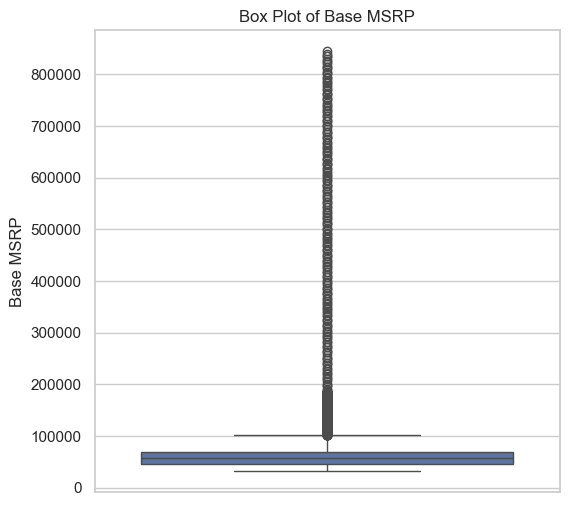

In [103]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Base MSRP
print(population_data['Base MSRP'].quantile(0.25))
print(population_data['Base MSRP'].quantile(0.75))
# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Create the boxplot
sns.boxplot(data=population_data, y='Base MSRP')
plt.title('Box Plot of Base MSRP')
plt.ylabel('Base MSRP')

# Show the plot
plt.show()

In [65]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = population_data['Base MSRP'].quantile(0.25)
Q3 = population_data['Base MSRP'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Treat outliers by capping them within the bounds
population_data['Base MSRP'] = population_data['Base MSRP'].apply(
    lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
)

45783.992952019515
68387.5


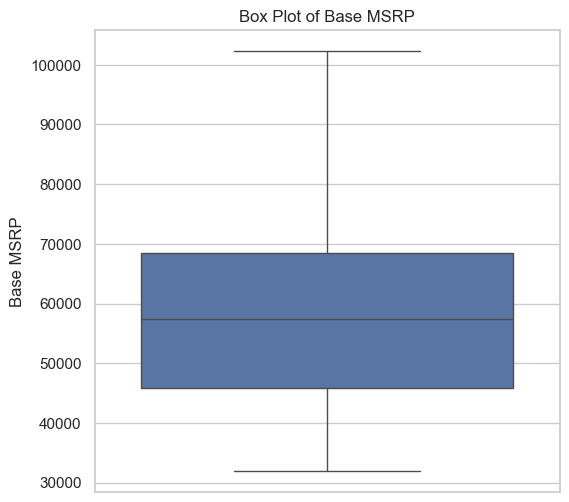

In [66]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Base MSRP
print(population_data['Base MSRP'].quantile(0.25))
print(population_data['Base MSRP'].quantile(0.75))
# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Create the boxplot
sns.boxplot(data=population_data, y='Base MSRP')
plt.title('Box Plot of Base MSRP')
plt.ylabel('Base MSRP')

# Show the plot
plt.show()

The price tag on new electric vehicles is still higher than gas-powered vehicles. Kelley Blue Book estimates that prices on new EVs dropped from $65,000 in May 2022 to $56,648 in May 2024,

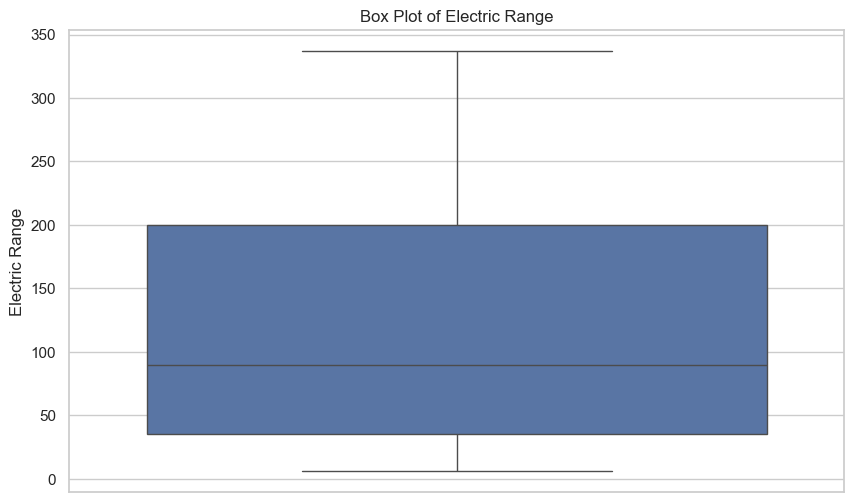

In [67]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=population_data, y='Electric Range')
plt.title('Box Plot of Electric Range')
plt.ylabel('Electric Range')

# Show the plot
plt.show()

In [41]:
population_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,209715.0,209715.000000,209715.000000,209702.000000,209715.0,2.097150e+05,209715.0
mean,9826613.405336,2021.049439,116.155723,56696.381134,28.93011,2.290924e+08,53039994591.789597
std,30778.026028,2.989277,86.038276,13951.913236,14.908303,7.116072e+07,16374890.614627
min,9800100.0,1999.000000,6.000000,31950.000000,1.0,4.469000e+03,53001950100.0
25%,9805200.0,2019.000000,35.000000,45793.000000,17.0,1.949052e+08,53033010001.0
50%,9812500.0,2022.000000,90.000000,57480.000000,32.0,2.405280e+08,53033030102.0
75%,9837400.0,2023.000000,200.000000,68372.000000,42.0,2.629824e+08,53053073130.0
max,9940300.0,2025.000000,337.000000,102240.500000,49.0,4.792548e+08,53077940008.0


#### 4.4 Adding Additional columuns for feature enginnering

In [113]:
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# 1. Age of Vehicle
population_data['Age of Vehicle'] = current_year - population_data['Model Year']

# 2. Electric Range Category
def classify_range(range_value):
    if range_value <= 100:
        return 'Low'
    elif 100 < range_value <= 250:
        return 'Medium'
    else:
        return 'High'

population_data['Electric Range Category'] = population_data['Electric Range'].apply(classify_range)

# 3. EV Adoption Year
# Assuming EVs are adopted around the model year itself
population_data['EV Adoption Year'] = population_data['Model Year']

# 4. Price Category
def classify_price(msrp):
    if msrp <= 30000:
        return 'Economy'
    elif 30000 < msrp <= 60000:
        return 'Mid-range'
    else:
        return 'Luxury'

population_data['Price Category'] = population_data['Base MSRP'].apply(classify_price)

# 5. Is Premium Vehicle
population_data['Is Premium Vehicle'] = population_data['Price Category'].apply(lambda x: True if x == 'Luxury' else False)

# Display the updated dataset
population_data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Age of Vehicle,Electric Range Category,EV Adoption Year,Price Category,Is Premium Vehicle
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10,3,Low,2021,Economy,False
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10,6,Medium,2018,Economy,False
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10,8,Low,2016,Economy,False
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10,6,Medium,2018,Economy,False
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,5,Medium,2019,Economy,False


In [114]:
population_data['Vehicle Age'] = current_year - population_data['Model Year']
population_data['Price per Electric Range'] = population_data['Base MSRP'] / population_data['Electric Range'].replace(0, 1)
population_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Age of Vehicle,EV Adoption Year,Vehicle Age,Price per Electric Range
count,210161.000000,210165.000000,210160.000000,210160.000000,209720.000000,2.101650e+05,2.101610e+05,210165.000000,210165.000000,210165.000000,210160.000000
mean,98178.209406,2021.048657,50.602241,897.676889,28.929954,2.290774e+08,5.297929e+10,2.951343,2021.048657,2.951343,22.400424
std,2445.429402,2.988941,86.973210,7653.588604,14.908392,7.115519e+07,1.551466e+09,2.988941,2.988941,2.988941,308.291774
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09,-1.000000,1999.000000,-1.000000,0.000000
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948816e+08,5.303301e+10,1.000000,2019.000000,1.000000,0.000000
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405164e+08,5.303303e+10,2.000000,2022.000000,2.000000,0.000000
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.629758e+08,5.305307e+10,5.000000,2023.000000,5.000000,0.000000
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10,25.000000,2025.000000,25.000000,70416.666667


#### 4.5 Trying to find Legislative discrict in the dataset P.S Still working on this

In [171]:
# Extract everything between the parentheses safely
population_data['Coordinates'] = population_data['Vehicle Location'].apply( lambda loc: loc[7:-1] if isinstance(loc, str) else None)
population_data['Coordinates']

0           -122.957046 46.991391
1         -122.6530052 47.4739066
2            -120.530331 46.59534
3            -120.530331 46.59534
4           -122.206146 47.839957
                   ...           
200043    -122.0483457 47.9435765
200044     -122.197791 47.0948565
200045      -117.428902 47.658268
200046      -122.306706 47.792043
200047       -122.636245 47.62806
Name: Coordinates, Length: 200048, dtype: object

In [221]:
from scipy.stats import mstats

# Winsorizing the Electric Range and Base MSRP
population_data['Electric Range'] = mstats.winsorize(population_data['Electric Range'], limits=[0.01, 0.01])  # 1% on both sides
population_data['Base MSRP'] = mstats.winsorize(population_data['Base MSRP'], limits=[0.01, 0.01])  # 1% on both sides

# Show the updated DataFrame
population_data.describe()  # Summary statistics to see the effect


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,200048.000000,200048.000000,200048.000000,199606.0,2.000480e+05,200044.0
mean,2020.871261,53.465823,784.532112,28.986063,2.262988e+08,52975446524.173584
std,2.994933,88.726315,6134.947851,14.908108,7.282433e+07,1605628439.899463
min,1997.000000,0.000000,0.000000,1.0,4.385000e+03,1001020100.0
25%,2019.000000,0.000000,0.000000,17.0,1.904573e+08,53033009801.0
50%,2022.000000,0.000000,0.000000,33.0,2.363396e+08,53033029901.0
75%,2023.000000,53.000000,0.000000,42.0,2.609659e+08,53053073121.0
max,2025.000000,322.000000,52900.000000,49.0,4.792548e+08,56021001100.0


In [227]:
population_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,162201.000000,162202.000000,162202.000000,162202.0,161865.000000,1.622020e+05,1.622010e+05
mean,98181.411212,2021.463009,13.844453,0.0,28.795261,2.282516e+08,5.297766e+10
std,2378.834860,2.924180,25.027006,0.0,14.923254,5.376776e+07,1.584139e+09
min,1731.000000,1997.000000,0.000000,0.0,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2021.000000,0.000000,0.0,17.000000,2.022286e+08,5.303301e+10
50%,98125.000000,2023.000000,0.000000,0.0,32.000000,2.386739e+08,5.303303e+10
75%,98373.000000,2023.000000,22.000000,0.0,42.000000,2.606466e+08,5.305307e+10
max,99577.000000,2025.000000,126.000000,0.0,49.000000,4.792548e+08,5.602100e+10


In [75]:
# Calculate the correlation coefficient
correlation = population_data['Electric Range'].corr(population_data['Base MSRP'])
print('Correlation coefficient:', correlation)

Correlation coefficient: 0.1122063602766857


## 5. Exploratory Data Analysis

#### 5.1 Average Base MSRP over the years

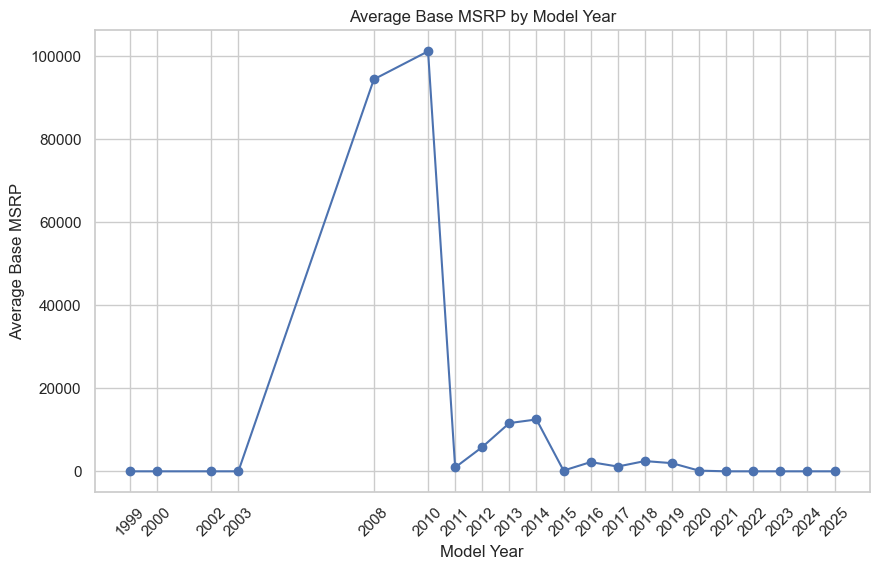

In [116]:
# Calculate the average Base MSRP by Model Year
avg_base_msrp_by_year = population_data.groupby('Model Year')['Base MSRP'].mean().reset_index()
# Plotting the time series for Avg Base MSRP by Model Year
plt.figure(figsize=(10, 6))
plt.plot(avg_base_msrp_by_year['Model Year'], avg_base_msrp_by_year['Base MSRP'], marker='o', linestyle='-')
plt.title("Average Base MSRP by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Average Base MSRP")
plt.xticks(avg_base_msrp_by_year['Model Year'], rotation=45)
plt.grid(True)
plt.show()

#### 5.2 EV's Count over the years

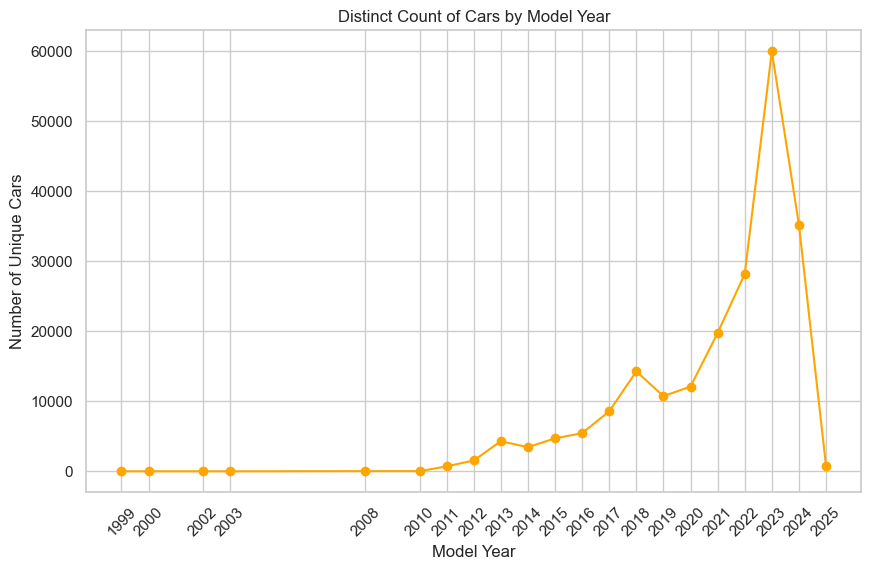

In [105]:
# Calculate the distinct count of vehicles by Model Year
distinct_vehicle_count_by_year = population_data.groupby('Model Year')['DOL Vehicle ID'].nunique().reset_index()

# Plotting the time series for the distinct count of vehicles by Model Year
plt.figure(figsize=(10, 6))
plt.plot(distinct_vehicle_count_by_year['Model Year'], distinct_vehicle_count_by_year['DOL Vehicle ID'], 
         marker='o', linestyle='-', color='orange')
plt.title("Distinct Count of Cars by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of Unique Cars")
plt.xticks(distinct_vehicle_count_by_year['Model Year'], rotation=45)
plt.grid(True)
plt.show()


#### 5.3 Correlation Matrix

Correlation between Electric Range and City: -0.00037596259017510375
Top 10 Cities with Highest Average Electric Range:
             City  Electric Range
433        Mystic           322.0
356    Little Elm           322.0
592        Satsop           322.0
279     Henderson           322.0
725   Waynesville           322.0
745       Wishram           322.0
576   Saint Louis           322.0
728  West Chicago           322.0
636        Sparks           308.0
510   Platte City           291.0


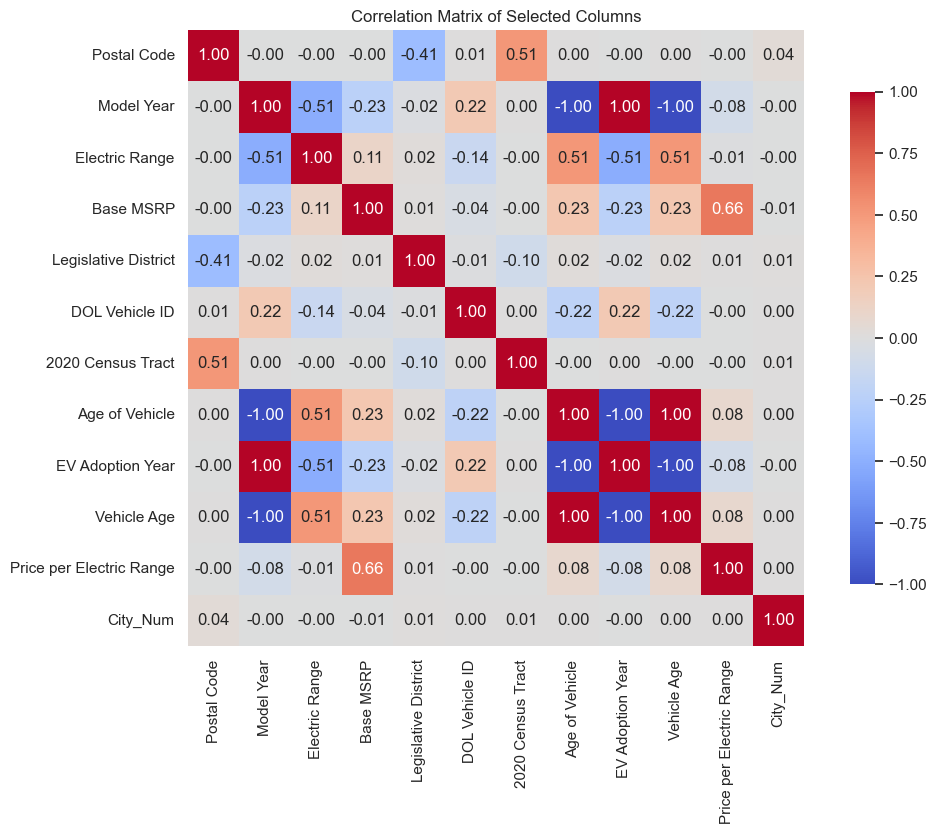

In [115]:
# Create a correlation matrix for the specified columns
correlation_matrix = population_data[['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 
                                      'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
                                      'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
                                      'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
                                      'Vehicle Location', 'Electric Utility', '2020 Census Tract',
                                      'Age of Vehicle', 'Electric Range Category', 'EV Adoption Year',
                                      'Price Category', 'Is Premium Vehicle', 'Vehicle Age',
                                      'Price per Electric Range', 'City_Num']].select_dtypes(include='number').corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Selected Columns')
plt.show()


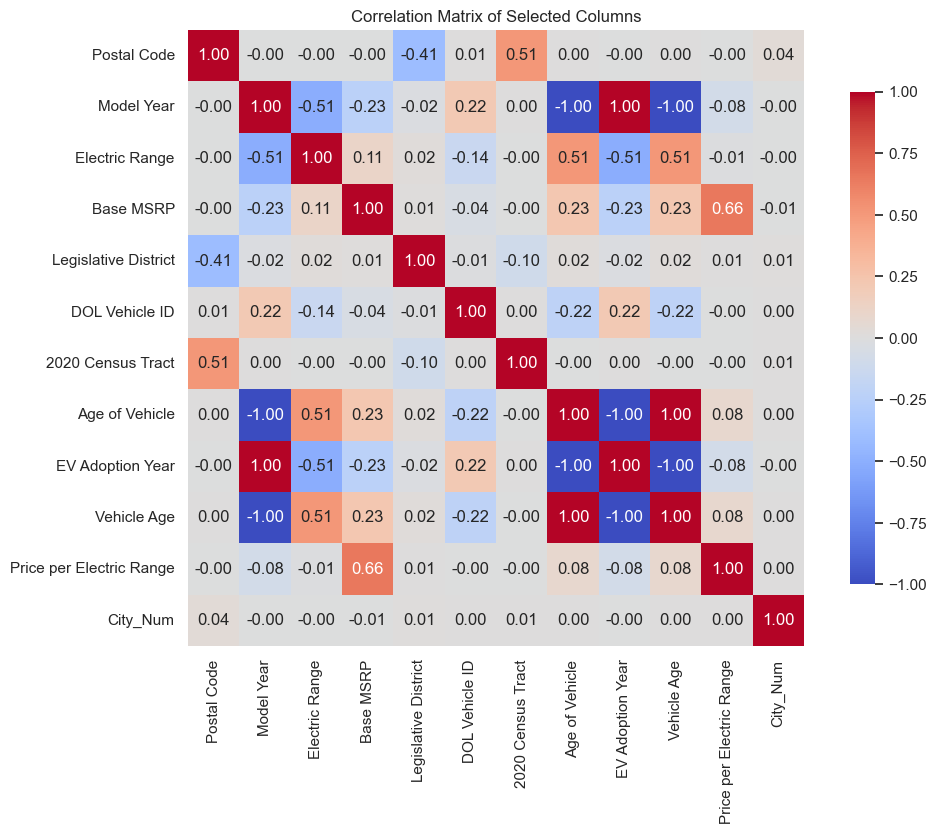

In [152]:
# Create a correlation matrix for the specified columns
population_data_encoded = population_data[['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 
                                      'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
                                      'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
                                      'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
                                      'Vehicle Location', 'Electric Utility', '2020 Census Tract',
                                      'Age of Vehicle', 'Electric Range Category', 'EV Adoption Year',
                                      'Price Category', 'Is Premium Vehicle', 'Vehicle Age',
                                       'City_Num']].select_dtypes(include='number').corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Selected Columns')
plt.show()


#### 5.4 Top 10 Manufactures in Washington

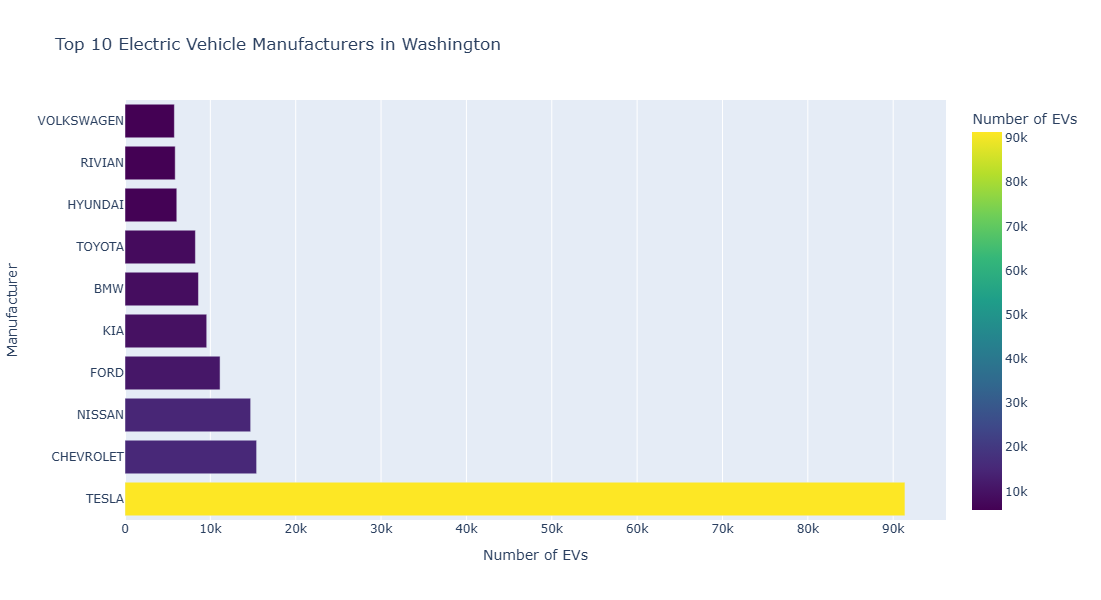

In [141]:
# Step 2: Count the number of EVs by manufacturer and get the top 10
EV_manufacturer_counts = population_data['Make'].value_counts().head(10)

# Step 3: Create a DataFrame for plotting
ev_counts_df = pd.DataFrame({
    'Manufacturer': EV_manufacturer_counts.index,
    'Number of EVs': EV_manufacturer_counts.values
})

# Step 4: Create the bar plot using Plotly with specified figure size
fig = px.bar(ev_counts_df, 
             x='Number of EVs', 
             y='Manufacturer', 
             orientation='h', 
             title='Top 10 Electric Vehicle Manufacturers in Washington',
             labels={'Number of EVs': 'Number of EVs', 'Manufacturer': 'Manufacturer'},
             color='Number of EVs', 
             color_continuous_scale=px.colors.sequential.Viridis,
             width=800,  # Set figure width
             height=600)  # Set figure height

# Show the plot
fig.show()

#### 5.5 Other visualizations

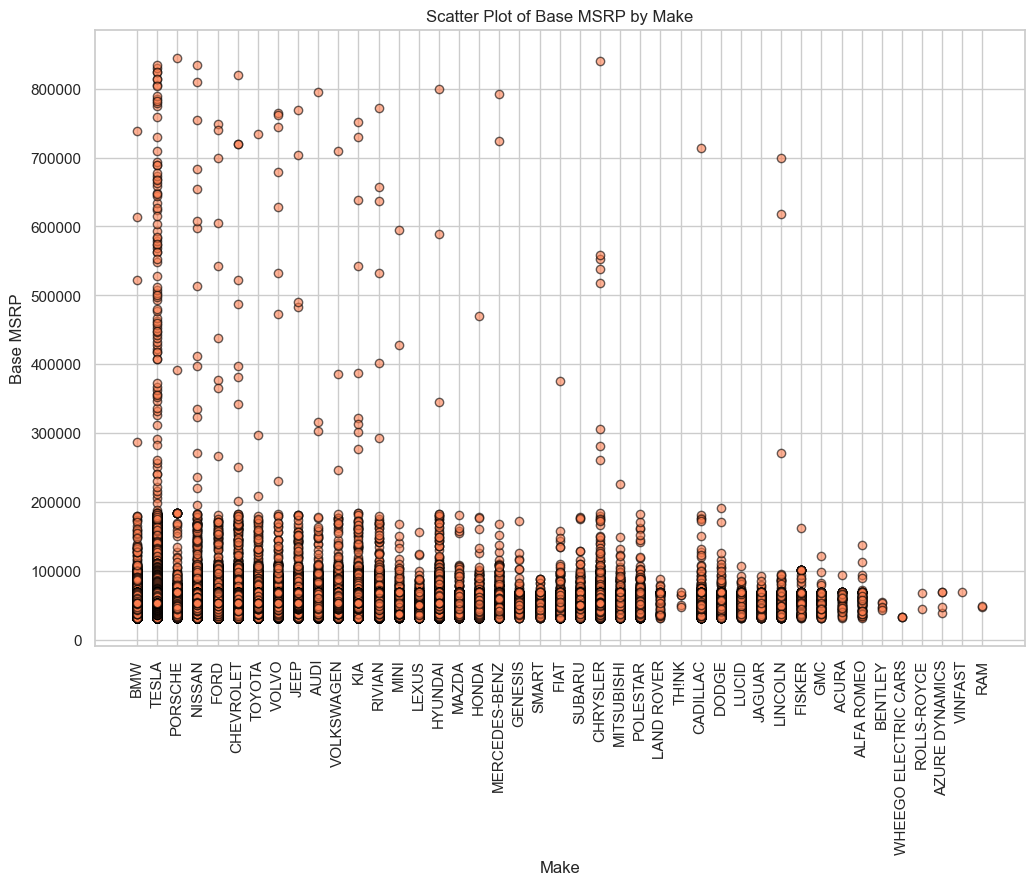

In [106]:
# Add jitter to make for better visibility
plt.figure(figsize=(12, 8))
plt.scatter(population_data['Make'], population_data['Base MSRP'], alpha=0.6, 
            color='coral', edgecolor='black')
plt.title("Scatter Plot of Base MSRP by Make")
plt.xlabel("Make")
plt.ylabel("Base MSRP")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


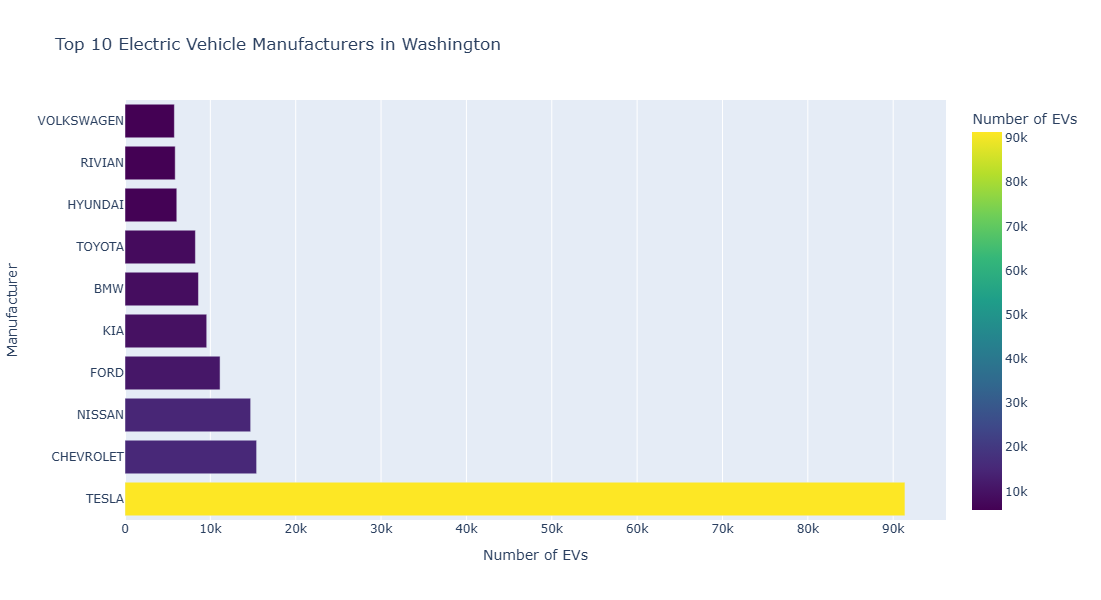

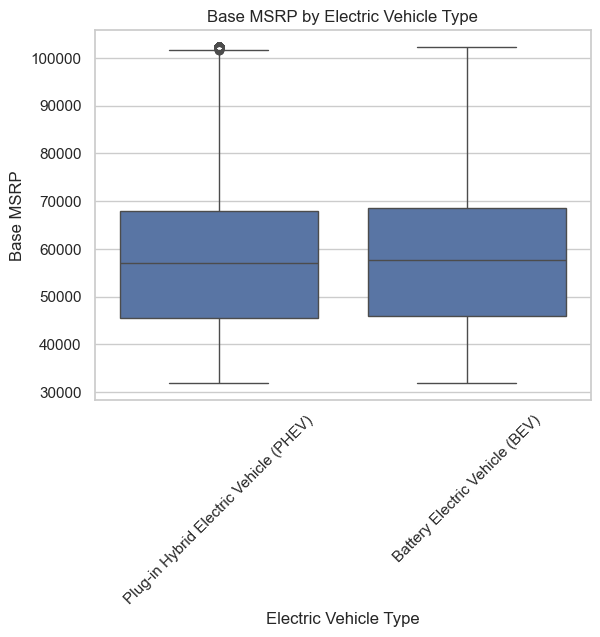

In [74]:
# Base MSRP by Electric Vehicle Type
sns.boxplot(data=population_data, x='Electric Vehicle Type', y='Base MSRP')
plt.title("Base MSRP by Electric Vehicle Type")
plt.xticks(rotation=45)
plt.show()


##### Top 10 Electric Manufatures in washington

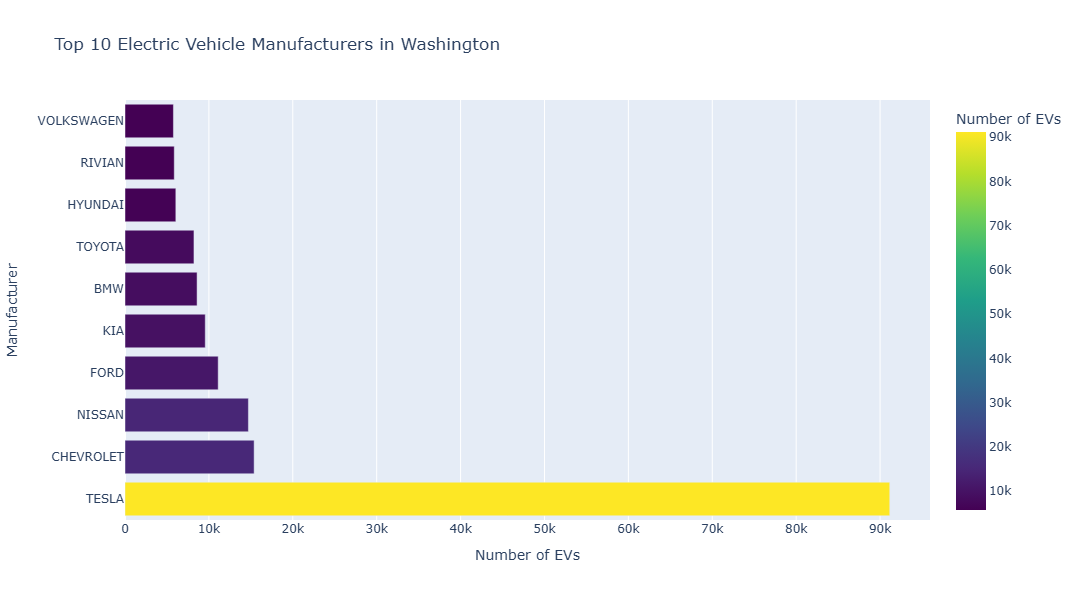

In [56]:
# Step 2: Count the number of EVs by manufacturer and get the top 10
EV_manufacturer_counts = population_data['Make'].value_counts().head(10)

# Step 3: Create a DataFrame for plotting
ev_counts_df = pd.DataFrame({
    'Manufacturer': EV_manufacturer_counts.index,
    'Number of EVs': EV_manufacturer_counts.values
})

# Step 4: Create the bar plot using Plotly with specified figure size
fig = px.bar(ev_counts_df, 
             x='Number of EVs', 
             y='Manufacturer', 
             orientation='h', 
             title='Top 10 Electric Vehicle Manufacturers in Washington',
             labels={'Number of EVs': 'Number of EVs', 'Manufacturer': 'Manufacturer'},
             color='Number of EVs', 
             color_continuous_scale=px.colors.sequential.Viridis,
             width=800,  # Set figure width
             height=600)  # Set figure height

# Show the plot
fig.show()

##### How does the electric range vary between car makers and between models?


C:\Users\fahad\AppData\Local\Temp\ipykernel_14324\3001207454.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




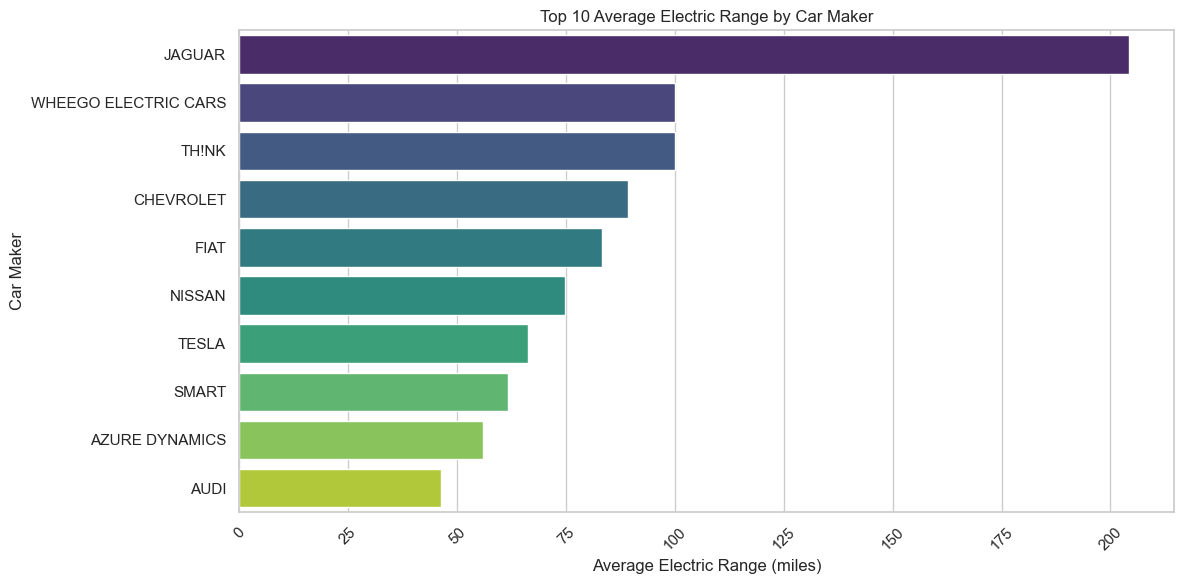

In [139]:
# Group by 'Make' and calculate the average 'Electric Range'
average_range_by_make = population_data.groupby('Make')['Electric Range'].mean().reset_index()

# Sort the results to get the top 10 makers with the highest average electric range
top_10_average_range_by_make = average_range_by_make.sort_values(by='Electric Range', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Electric Range', y='Make', data=top_10_average_range_by_make, palette='viridis')
plt.title('Top 10 Average Electric Range by Car Maker')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Car Maker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Which are the top 5 cities adopting EVs?


Top 5 Cities Adopting EVs:
City
Seattle      33851
Bellevue     10413
Vancouver     7475
Redmond       7437
Bothell       6875
Name: count, dtype: int64


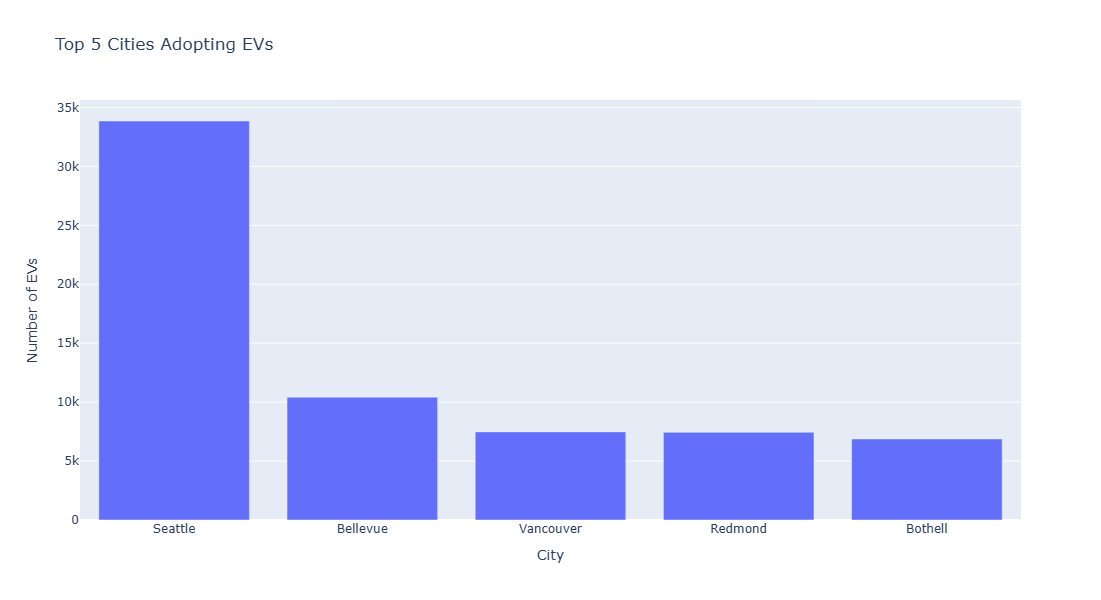

In [55]:
# 6. Top 5 cities adopting EVs
top_cities = population_data['City'].value_counts().head(5)

# Display the results
print("Top 5 Cities Adopting EVs:")
print(top_cities)

# Create a bar chart for top cities
fig6 = px.bar(top_cities, x=top_cities.index, y=top_cities.values,
               title='Top 5 Cities Adopting EVs',
               labels={'x': 'City', 'y': 'Number of EVs'},
                       width=800,  # Set figure width
             height=600)  # Set figure heigh)
fig6.show()


C:\Users\fahad\AppData\Local\Temp\ipykernel_20364\1935645979.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



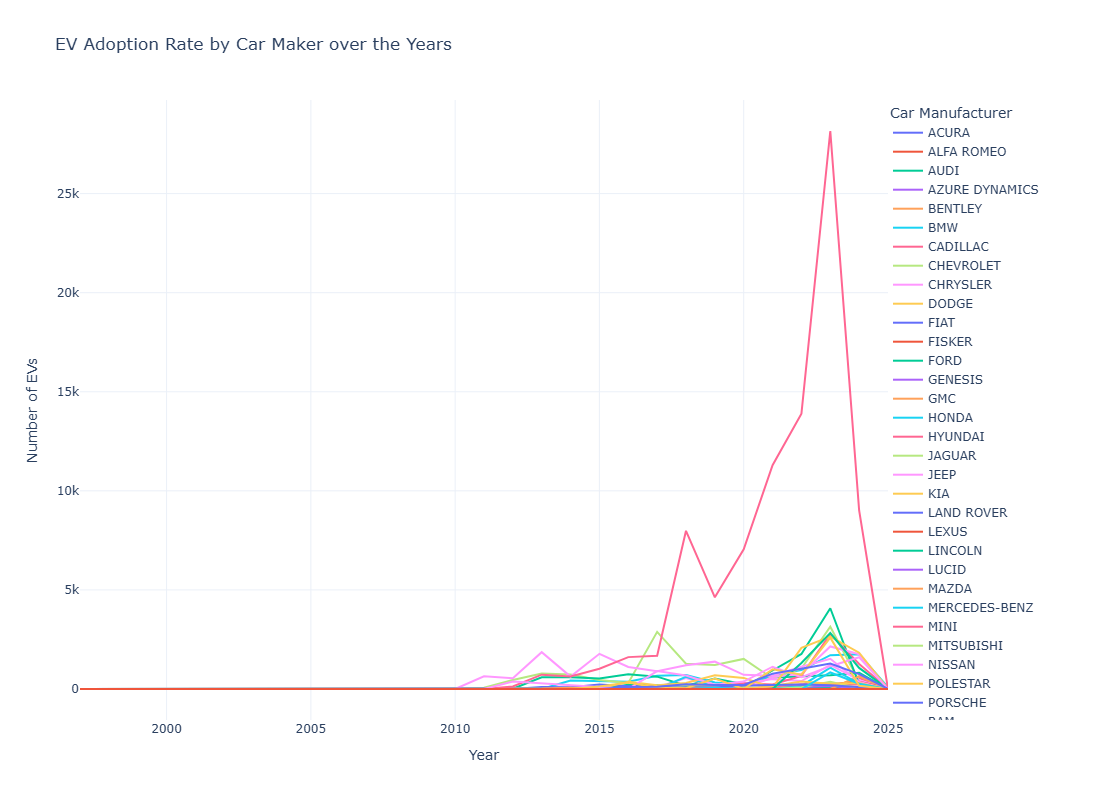

In [44]:
# Assuming population_data is already defined and contains the necessary data
adoption_rate_by_year = population_data.groupby(['Model Year', 'Make']).size().unstack().fillna(0)

# Reset index for better plotting
adoption_rate_by_year = adoption_rate_by_year.reset_index()

# Melt the DataFrame for Plotly compatibility
adoption_rate_melted = adoption_rate_by_year.melt(id_vars='Model Year', var_name='Make', value_name='Number of EVs')

# Create the line plot
fig = px.line(adoption_rate_melted, 
              x='Model Year', 
              y='Number of EVs', 
              color='Make', 
              title='EV Adoption Rate by Car Maker over the Years',
              labels={'Model Year': 'Year', 'Number of EVs': 'Number of EVs'},
              template='plotly_white')

# Update layout
fig.update_layout(
    legend_title_text='Car Manufacturer',
    legend=dict(x=1, y=1, traceorder='normal', orientation='v'),
    width=900,
    height=800
)

# Show the plot
fig.show()

##### Question 9. Which county has the greatest variety of EV car models?


In [118]:
county_variety = population_data.groupby('County')['Model'].nunique().sort_values(ascending=False).head(10)
county_variety

County
King         150
Snohomish    138
Pierce       136
Clark        134
Spokane      126
Kitsap       125
Thurston     122
Whatcom      120
Skagit       105
Benton       105
Name: Model, dtype: int64

## 6. Feature Engineering
•
Create New Features: Based on domain knowledge or interaction terms.
•
Feature Transformation: Normalize or standardize features, apply log transformations, etc.
•
Encoding Categorical Variables: Convert categorical variables to numerical using techniques like one-hot encoding, label encoding, or frequency encoding.

#### 6.1 Preparing the dataset and selecting relevent columns

In [119]:
population_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Age of Vehicle,EV Adoption Year,Vehicle Age,Price per Electric Range,City_Num
count,210161.000000,210165.000000,210160.000000,210160.000000,209720.000000,2.101650e+05,2.101610e+05,210165.000000,210165.000000,210165.000000,210160.000000,210165.000000
mean,98178.209406,2021.048657,50.602241,897.676889,28.929954,2.290774e+08,5.297929e+10,2.951343,2021.048657,2.951343,22.400424,417.529998
std,2445.429402,2.988941,86.973210,7653.588604,14.908392,7.115519e+07,1.551466e+09,2.988941,2.988941,2.988941,308.291774,225.319074
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09,-1.000000,1999.000000,-1.000000,0.000000,-1.000000
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948816e+08,5.303301e+10,1.000000,2019.000000,1.000000,0.000000,215.000000
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405164e+08,5.303303e+10,2.000000,2022.000000,2.000000,0.000000,478.000000
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.629758e+08,5.305307e+10,5.000000,2023.000000,5.000000,0.000000,598.000000
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10,25.000000,2025.000000,25.000000,70416.666667,757.000000


In [142]:
population_data = population_data.dropna(subset=['Base MSRP'])
columns_to_keep = [
    'Model Year',
    'Make',
    'Model',
    'Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Electric Range',
   'Base MSRP',
    'Electric Utility', 
    'Age of Vehicle', 
    'Electric Range Category', 
    'EV Adoption Year',
    'Price Category', 
    'Is Premium Vehicle'
]

# Create a new DataFrame with only the selected columns
population_data_filtered = population_data[columns_to_keep]


#### 6.2 Encoding the dataset
One-hot encoding is used to convert categorical variables into numeric form, which machine learning models require. It’s preferred because it doesn’t assume any order between categories, preventing bias that might occur if categorical values were assigned arbitrary numbers. It creates separate binary columns for each category, allowing models to treat them independently.







In [153]:
# Convert categorical columns to numeric using one-hot encoding
population_data_encoded = pd.get_dummies(population_data_filtered, drop_first=True)
population_data_encoded.head()

,Model Year,Electric Range,Base MSRP,Age of Vehicle,EV Adoption Year,Is Premium Vehicle,Make_ALFA ROMEO,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,...,Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY,Electric Utility_PUD NO 1 OF WHATCOM COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,Electric Range Category_Low,Electric Range Category_Medium,Price Category_Luxury,Price Category_Mid-range
0,2021,30.0,0.0,3,2021,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,2018,215.0,0.0,6,2018,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,2016,15.0,0.0,8,2016,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,2018,215.0,0.0,6,2018,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,2019,150.0,0.0,5,2019,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


#### 6.3 Adding extra features

In [144]:
# Feature Creation
current_year = pd.to_datetime('now').year
population_data_encoded['Vehicle Age'] = current_year - population_data_encoded['Model Year']

#### 6.4 Prepare Data for using feature scaling 
StandardScaler scales the features so that they have a mean of 0 and a standard deviation of 1.
This is useful because many machine learning models perform better when numerical features are on a similar scale, preventing some features from dominating others.

StandardScaler can be used for non-normalized data. In fact, it's designed to work with data that is not on the same scale. It standardizes features by removing the mean and scaling to unit variance, making it suitable for most types of data, even if they aren't initially normalized.



In [145]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = [ 'Base MSRP','Electric Range', 'Vehicle Age']
population_data_encoded[features_to_scale] = scaler.fit_transform(population_data_encoded[features_to_scale])
# Prepare data for modeling
X = population_data_encoded.drop('Base MSRP', axis=1)
y = population_data_encoded['Base MSRP']

#### 6.5 Feature Selection Using Random Forest
 Initialize the Random Forest Regressor
RandomForestRegressor(n_estimators=100, random_state=42) initializes the model.
n_estimators=100 specifies the number of decision trees in the forest.
random_state=42 ensures consistent results by controlling randomness in the model.
Why use random forest?
Random Forest: It's an ensemble model consisting of multiple decision trees. It captures non-linear relationships by combining several trees, each trained on different parts of the data.

Makes no specific assumptions about the data distribution or the relationship between features and target.

Provides feature importance scores based on how features impact decision splits, which can be used for feature selection and captures interactions naturally.


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [147]:
# Get feature importances
importances = rf_model.feature_importances_

In [148]:
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Display the top 10 features
top_10_features = feature_importances.head(20)
print(top_10_features)

                                               Feature  Importance
4                                   Is Premium Vehicle    0.354373
277                              Price Category_Luxury    0.299200
278                           Price Category_Mid-range    0.257184
54                                           Model_918    0.039562
1                                       Electric Range    0.022643
146                                     Model_PANAMERA    0.009049
23                                            Make_KIA    0.007737
3                                     EV Adoption Year    0.002222
0                                           Model Year    0.001877
2                                       Age of Vehicle    0.001264
279                                        Vehicle Age    0.001224
77                                     Model_CROSSTREK    0.000579
12                                       Make_CHRYSLER    0.000552
145                                     Model_PACIFICA    0.00

#### 6.6 Visualizing the top 10 Features

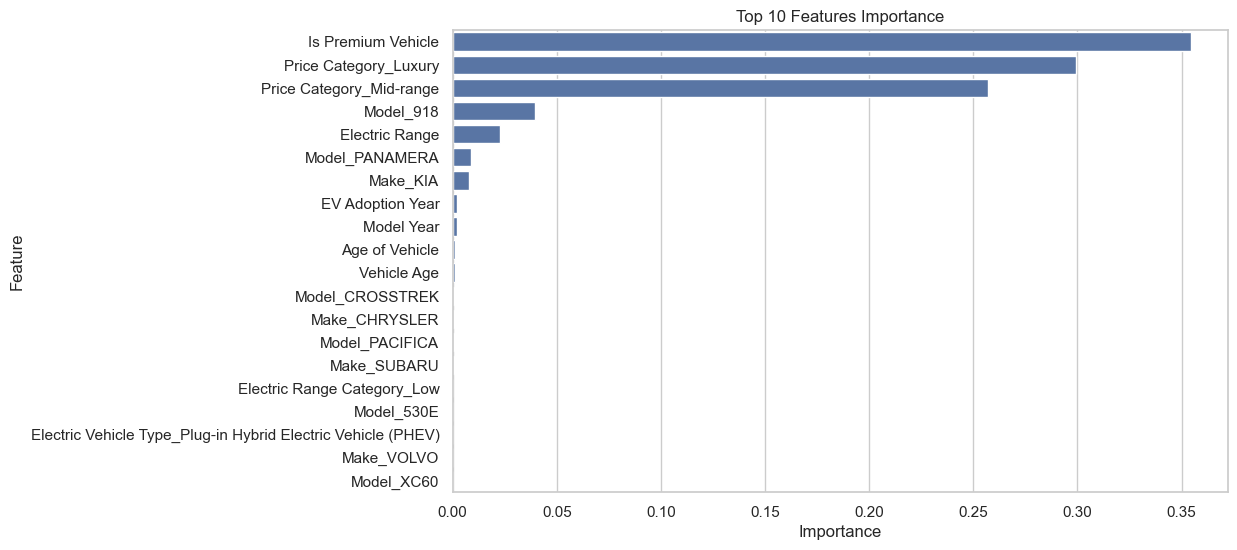

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Features Importance')
plt.show()

In [136]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210160 entries, 0 to 210164
Data columns (total 25 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210160 non-null  object 
 1   County                                             210156 non-null  object 
 2   City                                               210156 non-null  object 
 3   State                                              210160 non-null  object 
 4   Postal Code                                        210156 non-null  float64
 5   Model Year                                         210160 non-null  int64  
 6   Make                                               210160 non-null  object 
 7   Model                                              210160 non-null  object 
 8   Electric Vehicle Type                              210160 non-null  object 
 9 

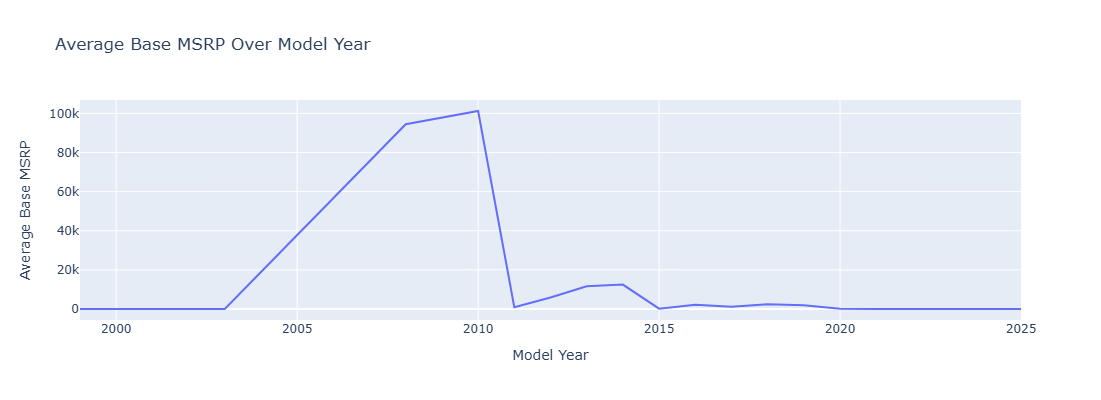

In [137]:

# Grouping by 'Model Year' and calculating the average of 'Base MSRP'
average_msrp = population_data.groupby('Model Year')['Base MSRP'].mean().reset_index()

# Creating the trend chart for the average 'Base MSRP' over 'Model Year'
fig = px.line(average_msrp, x='Model Year', y='Base MSRP', title='Average Base MSRP Over Model Year')
fig.update_layout(
    xaxis_title='Model Year',
    yaxis_title='Average Base MSRP',
    showlegend=False,
    width=600,   # Set the width of the figure
    height=400   # Set the height of the figure
)

# Displaying the chart
fig.show()


Insights 
Histogram: The histogram reveals a right-skewed distribution of base MSRPs. This means that there is a tail of higher-priced vehicles, while most vehicles are clustered in the lower MSRP range. There appears to be a significant peak around the $80,000 mark, indicating a concentration of vehicles in this price range.
Q-Q Plot: The Q-Q plot shows a deviation from a straight line, particularly in the tails. This indicates that the distribution of base MSRPs is not perfectly normal. The deviation in the right tail aligns with the right-skewness observed in the histogram.
Shapiro-Wilk:The statistic of 0.8505 indicates a departure from normality. p-value: The p-value is less than the common significance level of 0.05. This suggests that you can reject the null hypothesis, which states that the data is normally distributed.
